In [2]:

import numpy as np

# fake_data_file.npy
file_path = '../OUTPUT/rounD_map06_seq1000_interval100_nfea100/ddpm_fake_rounD_map06_interval100_seq1000_nfea100.npy'

# 使用numpy的load函数读取npy文件
fake_data_norm = np.load(file_path)

# 现在，变量data包含了npy文件中的数据
# 你可以打印数据来查看内容，或者进行其他操作
print(fake_data_norm[0])

[[6.95383847e-01 3.10474396e-01 8.30641866e-01 ... 9.97557819e-01
  1.97845697e-03 9.97480363e-01]
 [6.98643148e-01 3.06290627e-01 8.22550148e-01 ... 9.97544557e-01
  1.97714567e-03 9.97488469e-01]
 [6.95976615e-01 3.09155196e-01 8.26793015e-01 ... 9.97545719e-01
  1.97029114e-03 9.97500122e-01]
 ...
 [7.10546970e-04 9.98124719e-01 4.65494394e-03 ... 9.98088449e-01
  1.78208947e-03 9.97719139e-01]
 [3.23060155e-03 9.95655745e-01 4.77141142e-03 ... 9.98081923e-01
  1.78027153e-03 9.97727215e-01]
 [1.53228641e-03 9.97588992e-01 5.16721606e-03 ... 9.98071104e-01
  1.80876255e-03 9.97658402e-01]]


In [3]:
print(fake_data_norm.shape)
print(fake_data_norm[0].shape)

(500, 1000, 100)
(1000, 100)


In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("/DATA1/rzhou/ika/multi_testcases/rounD/ori/rounD_map06_interval100_seq1000_nfea100.csv", header=0)
data = df.values
scaler = MinMaxScaler()
scaler = scaler.fit(data[:,1:])
seq_length=1000
num_feature=100
fake_data=scaler.inverse_transform(fake_data_norm.reshape(-1, num_feature)).reshape(-1, seq_length, num_feature)


In [5]:
print(fake_data)
print(fake_data.shape)

[[[ 9.94095018e+01 -5.69069618e+01  1.15658823e+02 ... -1.87020520e-01
    1.78335540e-01 -9.01692539e-02]
  [ 9.98754395e+01 -5.72522508e+01  1.14532129e+02 ... -1.88036117e-01
    1.78217341e-01 -8.98791594e-02]
  [ 9.94942418e+01 -5.70158362e+01  1.15122907e+02 ... -1.87947110e-01
    1.77599482e-01 -8.94621486e-02]
  ...
  [ 1.01577166e-01 -1.54768094e-01  6.48155791e-01 ... -1.46385219e-01
    1.60635228e-01 -8.16242652e-02]
  [ 4.61834844e-01 -3.58533950e-01  6.64372757e-01 ... -1.46885030e-01
    1.60471361e-01 -8.13352373e-02]
  [ 2.19049995e-01 -1.98981927e-01  7.19484715e-01 ... -1.47713483e-01
    1.63039505e-01 -8.37978407e-02]]

 [[ 7.49943977e+01 -4.26553671e+01  1.00405114e+02 ... -1.93926581e-01
    1.25645616e-01 -4.31238229e-02]
  [ 7.55547252e+01 -4.29930239e+01  1.01978376e+02 ... -1.97527957e-01
    1.28119737e-01 -4.24295160e-02]
  [ 7.48182034e+01 -4.25872484e+01  1.00650942e+02 ... -1.97299733e-01
    1.27601273e-01 -4.25756297e-02]
  ...
  [ 1.29789732e-01  9.1

In [6]:
# 将所有绝对值小于10的元素替换为0
fake_data[np.abs(fake_data) < 10] = 0

# 验证替换结果
fake_data[:1]  # 展示处理后的第一个样本以减少输出量

array([[[ 99.40950181, -56.90696183, 115.65882258, ...,   0.        ,
           0.        ,   0.        ],
        [ 99.87543945, -57.25225082, 114.53212934, ...,   0.        ,
           0.        ,   0.        ],
        [ 99.49424176, -57.01583619, 115.12290745, ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]]])

In [8]:
#optional,有需求的话可以打出来看一眼
df_single = pd.DataFrame(fake_data[0])
df_single.to_csv("check_faka_data.csv", index=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


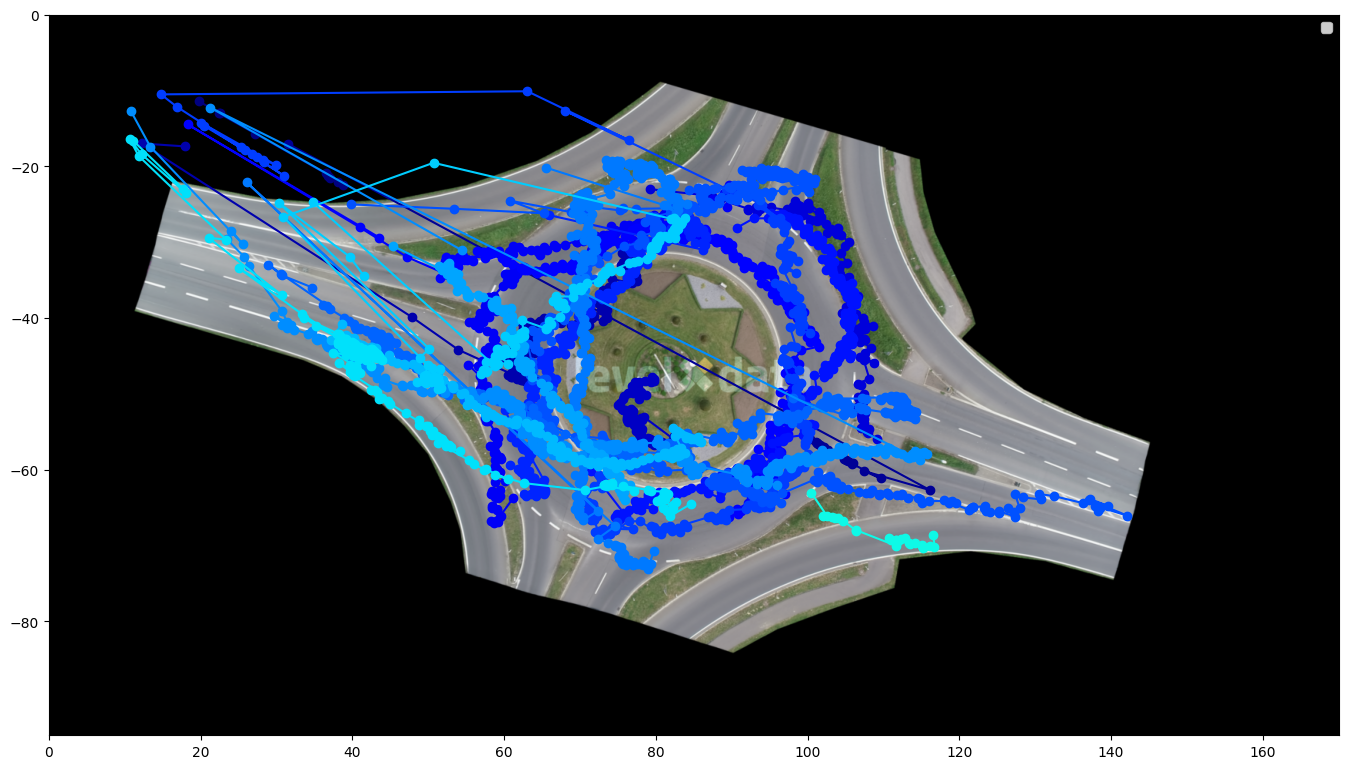

In [12]:
#画轨迹的静态图 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 载入背景图片
#bg_image_path = '/DATA1/rzhou/ika/inD/data/19_background.png'  
bg_image_path = '/DATA1/rzhou/ika/rounD/data/06_background.png'
bg_img = Image.open(bg_image_path)
# 获取图像的宽度和高度
width, height = bg_img.size

# 将图像的尺寸转换为英寸（matplotlib的figsize是以英寸为单位的）
# 假设希望每100像素对应于1英寸，则可以按如下方式计算figsize：
figsize = (width / 100, height / 100)

# 创建图形和轴，使用图像的原始尺寸
fig, ax = plt.subplots(figsize=figsize)

# inD-19
# # 设置坐标轴的范围
# ax.set_xlim(0, 80)
# ax.set_ylim(-60, 0)
# # 绘制背景图：这需要一个真实的背景图文件
# # 使用extent来匹配背景图的实际坐标位置
# bg_img = plt.imread(bg_image_path)
# ax.imshow(bg_img, extent=[0, 117, -78, 0])


# rounD-02
# 设置坐标轴的范围
ax.set_xlim(0, 170)
ax.set_ylim(-95, 0)
# 加载并显示背景图
bg_img = plt.imread(bg_image_path)
ax.imshow(bg_img, extent=[0, 170, -95, 0])


num_tracks = 50  # 假设有num_tracks个轨迹
colors = plt.cm.jet(np.linspace(0, 1, num_tracks))  # 生成颜色

for i in range(num_tracks):
    # 提取每个轨迹的x和y坐标
    x = fake_data[222][:, i * 2]  # 偶数列为x坐标
    y = fake_data[222][:, i * 2 + 1]  # 奇数列为y坐标
    
    # 过滤出非零点
    nonzero_indices = (x != 0) & (y != 0)
    x_filtered = x[nonzero_indices]
    y_filtered = y[nonzero_indices]

    # 绘制轨迹
    ax.plot(x_filtered, y_filtered, marker='o', linestyle='-', color=colors[i])  # 移除了label参数，以避免图例过于拥挤

# 添加图例
ax.legend()

plt.show()


555


/tmp/ipykernel_453273/1881559705.py:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)


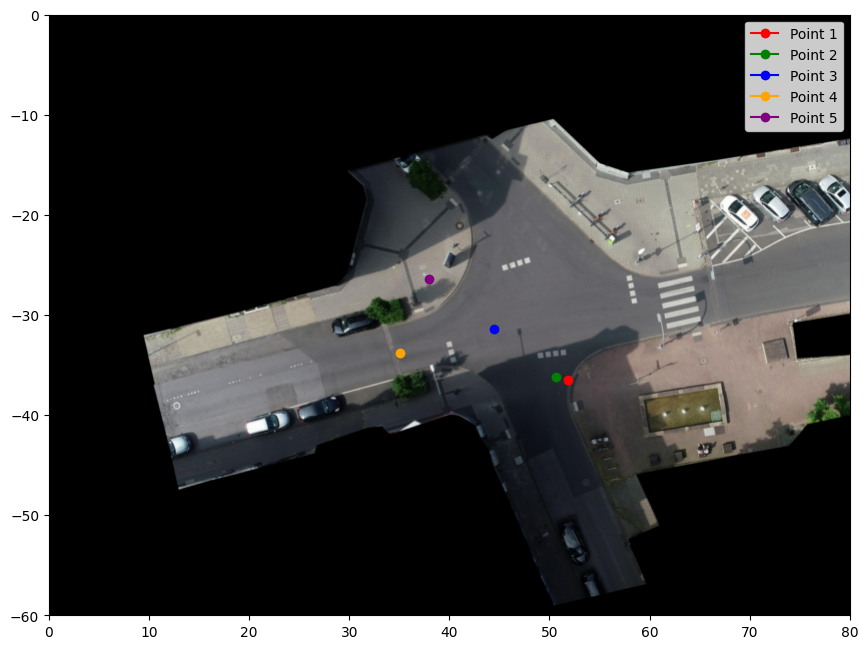

In [22]:
#动画 5个点
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import random

# 假设 fake_data 是一个形状为 (2001, 100, 10) 的数组
# 这里你需要加载你的真实数据
# fake_data = ...

# 随机选择一个元素而不是固定的 330
random_index = random.randint(0, fake_data.shape[0] - 1)
#random_index=111
print(random_index)

# 载入背景图片
bg_image_path = '/DATA1/rzhou/ika/inD/data/19_background.png'
fig, ax = plt.subplots(figsize=(11.7, 7.8))
ax.set_xlim(0, 80)
ax.set_ylim(-60, 0)
bg_img = plt.imread(bg_image_path)
ax.imshow(bg_img, extent=[0, 117, -78, 0])

colors = ['red', 'green', 'blue', 'orange', 'purple']
lines = [ax.plot([], [], marker='o', linestyle='-', color=colors[i], label=f'Point {i+1}')[0] for i in range(5)]

def init():
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    for j, line in enumerate(lines):
        x = fake_data[random_index][i, j*2]
        y = fake_data[random_index][i, j*2+1]
        line.set_data(x, y)
    return lines

anim = FuncAnimation(fig, animate, init_func=init, frames=250, interval=40, blit=True)

plt.legend()

# 保存动画为MP4
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
anim.save(f'/home/rzhou/Projects/Diffusion-TS/OUTPUT/inD_multi_18-29_interval250/samples/19map/{random_index}.mp4', writer=writer)


In [13]:
#动画, 多个点
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import random
from PIL import Image

# 假设 fake_data 是一个形状为 (num_cases, 1500, 60) 的数组
# 生成1个case
# random_index = random.randint(0, fake_data.shape[0] - 1)
# #random_index = 111
# print(f"Random index: {random_index}")

# 生成多个case
num_cases=5
random_indices = np.random.choice(fake_data.shape[0], num_cases, replace=False)
print(f"Random indices: {random_indices}")

num_v=50

# 载入背景图片
bg_image_path = '/DATA1/rzhou/ika/rounD/data/06_background.png'
#bg_image_path = '/DATA1/rzhou/ika/inD/data/19_background.png'
bg_img = Image.open(bg_image_path)
# 获取图像的宽度和高度
width, height = bg_img.size
# 将图像的尺寸转换为英寸（matplotlib的figsize是以英寸为单位的）
# 假设希望每100像素对应于1英寸，则可以按如下方式计算figsize：
figsize = (width / 100, height / 100)

#设置num_v个颜色
colors = plt.cm.jet(np.linspace(0, 1, num_v))


for random_index in random_indices:
    # 创建图形和轴，使用图像的原始尺寸
    fig, ax = plt.subplots(figsize=figsize)
    bg_img = plt.imread(bg_image_path)
    # inD-19
    # ax.set_xlim(0, 80)
    # ax.set_ylim(-60, 0)
    # ax.imshow(bg_img, extent=[0, 117, -78, 0])

    # rounD-02
    ax.set_xlim(0, 170)
    ax.set_ylim(-95, 0)
    ax.imshow(bg_img, extent=[0, 170, -95, 0])

    lines = [ax.plot([], [], marker='o', linestyle='', color=colors[i])[0] for i in range(num_v)]

    def init():
        for line in lines:
            line.set_data([], [])
        return lines

    def animate(i):
        for j, line in enumerate(lines):
            x = fake_data[random_index][i, j*2]
            y = fake_data[random_index][i, j*2+1]
            # 如果x或y为0，则不显示该点
            if x == 0 and y == 0:
                line.set_data([], [])
            else:
                line.set_data(x, y)
        return lines

    anim = FuncAnimation(fig, animate, init_func=init, frames=1000, interval=40, blit=True)

    #plt.legend([f"Point {i+1}" for i in range(num_v)], loc='upper right', fontsize='small')
    # 在每个动画循环的末尾，但在保存动画之前，添加图例
    plt.legend([f"Point {i+1}" for i in range(num_v)], loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')


    # 保存动画为MP4
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
    anim.save(f'/home/rzhou/Projects/Diffusion-TS/OUTPUT/rounD_map06_seq1000_interval100_nfea100/animation/{random_index}.mp4', writer=writer)
    plt.close(fig)  # 关闭当前绘图窗口，防止过多图形打开

Random indices: [ 75 462 380 316  96]


/tmp/ipykernel_606488/3543324319.py:65: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)
/tmp/ipykernel_606488/3543324319.py:65: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)
/tmp/ipykernel_606488/3543324319.py:65: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)
/tmp/ipykernel_606488/3543324319.py:65: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)
/tmp/ipykernel_606488/3543324319.py:65: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)
